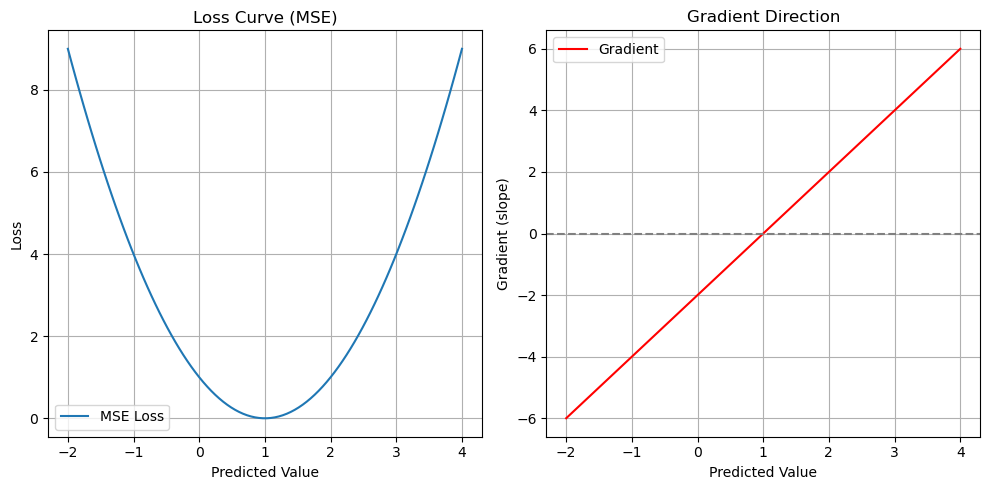

In [2]:
# Concept of Gradient
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple grid of predictions and actuals
y_true = 1.0  # the true value (like 1)
y_preds = np.linspace(-2, 4, 100)  # range of model predictions

# Calculate Mean Squared Error (MSE) and its gradient
mse_loss = (y_preds - y_true)**2
mse_gradient = 2 * (y_preds - y_true)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(y_preds, mse_loss, label='MSE Loss')
plt.title("Loss Curve (MSE)")
plt.xlabel("Predicted Value")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_preds, mse_gradient, label='Gradient', color='red')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Gradient Direction")
plt.xlabel("Predicted Value")
plt.ylabel("Gradient (slope)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
# Main Example
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [5]:
# Each row is a house with features
df = pd.DataFrame({
    'Square_Feet': [1000, 1500, 2000, 1200, 2500, 1800],
    'Bedrooms': [2, 3, 4, 2, 5, 3],
    'Location_Score': [3, 4, 5, 3, 5, 4],
    'High_Price': [0, 0, 1, 0, 1, 1]  # Target: 1 = High, 0 = Low
})

print(df)

X = df[['Square_Feet', 'Bedrooms', 'Location_Score']]
y = df['High_Price']

   Square_Feet  Bedrooms  Location_Score  High_Price
0         1000         2               3           0
1         1500         3               4           0
2         2000         4               5           1
3         1200         2               3           0
4         2500         5               5           1
5         1800         3               4           1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Build GBM
gbm = GradientBoostingClassifier(
    n_estimators=100,      # How many trees
    learning_rate=0.1,     # How much each tree contributes
    max_depth=3,           # Max depth of each tree
    random_state=1
)

gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [7]:
# Predict a new house: 1600 sq ft, 3 beds, location score 4
new_house = [[1600, 3, 4]]
pred = gbm.predict(new_house)
print("Prediction for new house:", "High Price" if pred[0] == 1 else "Low Price")

Prediction for new house: High Price


C:\Users\saket.khopkar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [8]:
# Evalueate
y_pred = gbm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Detailed Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5
Detailed Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\saket.khopkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saket.khopkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saket.khopkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


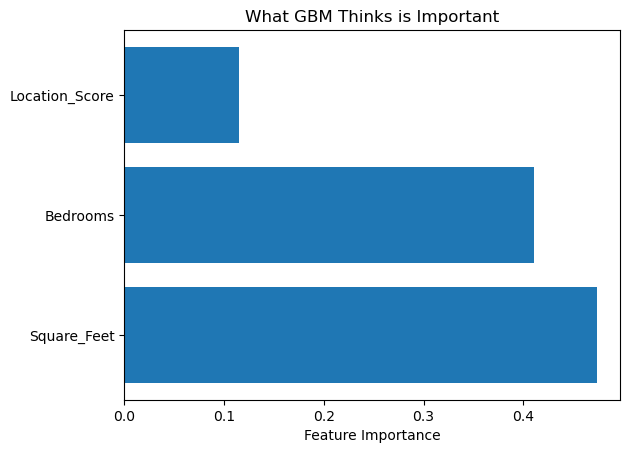

In [9]:
import matplotlib.pyplot as plt

importances = gbm.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("What GBM Thinks is Important")
plt.show()

In [13]:
# Plotting Curves without gradients - setup
import numpy as np
import matplotlib.pyplot as plt

# Predicted values ranging from -1 to 3
y_pred = np.linspace(-1, 3, 500)
y_true = 1.0

# MSE Loss
mse_loss = (y_pred - y_true)**2

# MAE Loss
mae_loss = np.abs(y_pred - y_true)

# For Log Loss, predictions must be probabilities (0 < p < 1)
probs = np.linspace(0.001, 0.999, 500)
log_loss = -np.log(probs)  # Assuming y = 1

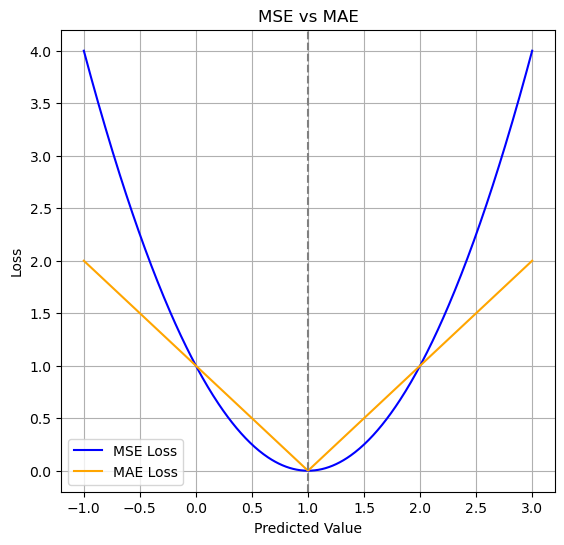

In [11]:
# Plotting MAE and MSE

plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(y_pred, mse_loss, label='MSE Loss', color='blue')
plt.plot(y_pred, mae_loss, label='MAE Loss', color='orange')
plt.axvline(x=y_true, color='gray', linestyle='--')
plt.title("MSE vs MAE")
plt.xlabel("Predicted Value")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

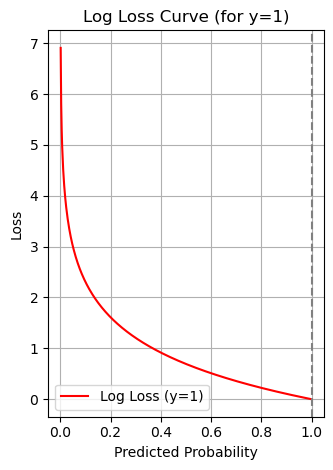

In [12]:
# Plot Log Loss
plt.subplot(1, 2, 2)
plt.plot(probs, log_loss, label='Log Loss (y=1)', color='red')
plt.axvline(x=1.0, color='gray', linestyle='--')
plt.title("Log Loss Curve (for y=1)")
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Plotting curves with Gradient
import numpy as np
import matplotlib.pyplot as plt

# Simulate predictions
y_pred = np.linspace(-1, 3, 500)
y_true = 1.0

# MSE: Loss and Gradient
mse_loss = (y_pred - y_true)**2
mse_grad = 2 * (y_pred - y_true)

# MAE: Loss and Gradient
mae_loss = np.abs(y_pred - y_true)
mae_grad = np.sign(y_pred - y_true)

# Log Loss for y=1
probs = np.linspace(0.001, 0.999, 500)
log_loss = -np.log(probs)
log_grad = -1 / probs

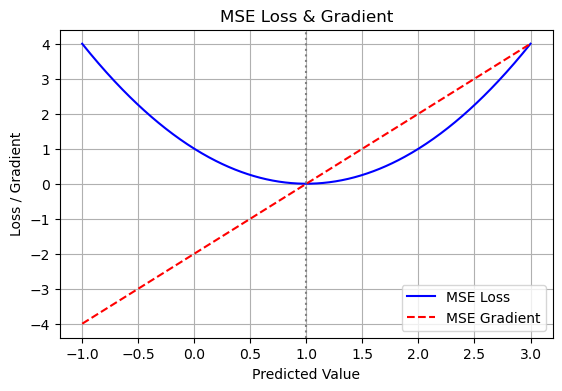

In [15]:
# Plot 1: MSE – Squared Error
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(y_pred, mse_loss, label='MSE Loss', color='blue')
plt.plot(y_pred, mse_grad, label='MSE Gradient', color='red', linestyle='--')
plt.axvline(y_true, color='gray', linestyle=':')
plt.title("MSE Loss & Gradient")
plt.xlabel("Predicted Value")
plt.ylabel("Loss / Gradient")
plt.legend()
plt.grid(True)

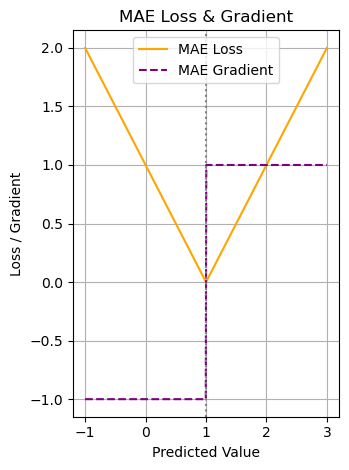

In [16]:
# Plot 2: MAE – Absolute Error
plt.subplot(1, 2, 2)
plt.plot(y_pred, mae_loss, label='MAE Loss', color='orange')
plt.plot(y_pred, mae_grad, label='MAE Gradient', color='purple', linestyle='--')
plt.axvline(y_true, color='gray', linestyle=':')
plt.title("MAE Loss & Gradient")
plt.xlabel("Predicted Value")
plt.ylabel("Loss / Gradient")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

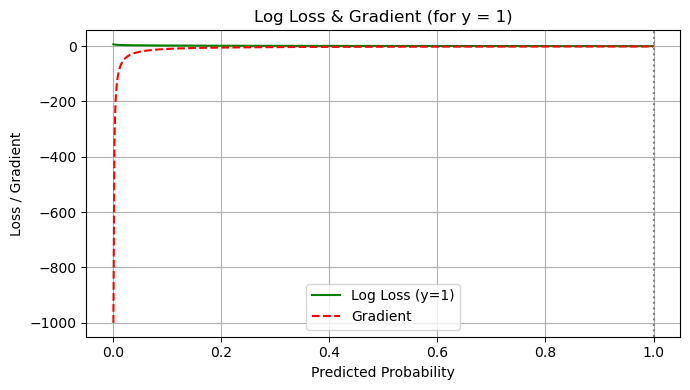

In [17]:
# Plot 3: Log Loss for Classification
plt.figure(figsize=(7, 4))
plt.plot(probs, log_loss, label='Log Loss (y=1)', color='green')
plt.plot(probs, log_grad, label='Gradient', color='red', linestyle='--')
plt.axvline(1.0, color='gray', linestyle=':')
plt.title("Log Loss & Gradient (for y = 1)")
plt.xlabel("Predicted Probability")
plt.ylabel("Loss / Gradient")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()